<a href="https://colab.research.google.com/github/gowthami-08/Elvatelabs/blob/main/ElevateLabs_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("heart.csv")
print(df.head())
print(df.info())
print(df.describe())


   ID  Age  Gender  Height_cm  Weight_kg    BMI  Daily_Steps  Calories_Intake  \
0   1   56    Male        164         81  30.72         5134             1796   
1   2   69    Male        156         82  20.86        12803             1650   
2   3   46  Female        158         65  30.93        16408             1756   
3   4   32    Male        197         87  31.19        18420             2359   
4   5   60    Male        157         63  29.37        17351             2556   

   Hours_of_Sleep  Heart_Rate Blood_Pressure  Exercise_Hours_per_Week Smoker  \
0             8.6         102         137/72                      8.1     No   
1             4.5         103         129/65                      3.7     No   
2             4.3          74         127/68                      3.2    Yes   
3             4.1         116         125/86                      8.5     No   
4             5.1         111         100/64                      8.5    Yes   

   Alcohol_Consumption_per_Week 

In [6]:
df.isnull().sum()


,0
ID,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
BMI,0
Daily_Steps,0
Calories_Intake,0
Hours_of_Sleep,0
Heart_Rate,0


In [12]:
print(df.columns)


Index(['ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
       'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate', 'Blood_Pressure',
       'Exercise_Hours_per_Week', 'Smoker', 'Alcohol_Consumption_per_Week',
       'Diabetic', 'Heart_Disease'],
      dtype='object')


In [13]:
df = pd.get_dummies(df, columns=['Gender', 'Smoker', 'Diabetic'], drop_first=True)


In [17]:
# Split into systolic and diastolic pressure
df[['Systolic', 'Diastolic']] = df['Blood_Pressure'].str.split('/', expand=True)

# Convert to numeric
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

# Drop the original string column
df.drop('Blood_Pressure', axis=1, inplace=True)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
            'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate',
            'Systolic', 'Diastolic', 'Exercise_Hours_per_Week',
            'Alcohol_Consumption_per_Week']

df[num_cols] = scaler.fit_transform(df[num_cols])


In [19]:
print(df.head())  # See first 5 rows
print(df[num_cols].describe())  # Check mean ≈ 0 and std ≈ 1


   ID       Age  Height_cm  Weight_kg       BMI  Daily_Steps  Calories_Intake  \
0   1  0.339295  -0.739268  -0.167133  0.834142    -1.025919        -0.807759   
1   2  1.057320  -1.289677  -0.117272 -1.226918     0.383310        -1.029806   
2   3 -0.213033  -1.152075  -0.964902  0.878038     1.045752        -0.868594   
3   4 -0.986291   1.531169   0.132031  0.932387     1.415470         0.048490   
4   5  0.560226  -1.220876  -1.064623  0.551948     1.219034         0.348101   

   Hours_of_Sleep  Heart_Rate  Exercise_Hours_per_Week  \
0        0.950162    0.859340                 1.073119   
1       -1.354828    0.909042                -0.472706   
2       -1.467266   -0.532304                -0.648368   
3       -1.579705    1.555162                 1.213648   
4       -1.017512    1.306654                 1.213648   

   Alcohol_Consumption_per_Week Heart_Disease  Gender_Male  Smoker_Yes  \
0                      0.851256            No         True       False   
1               

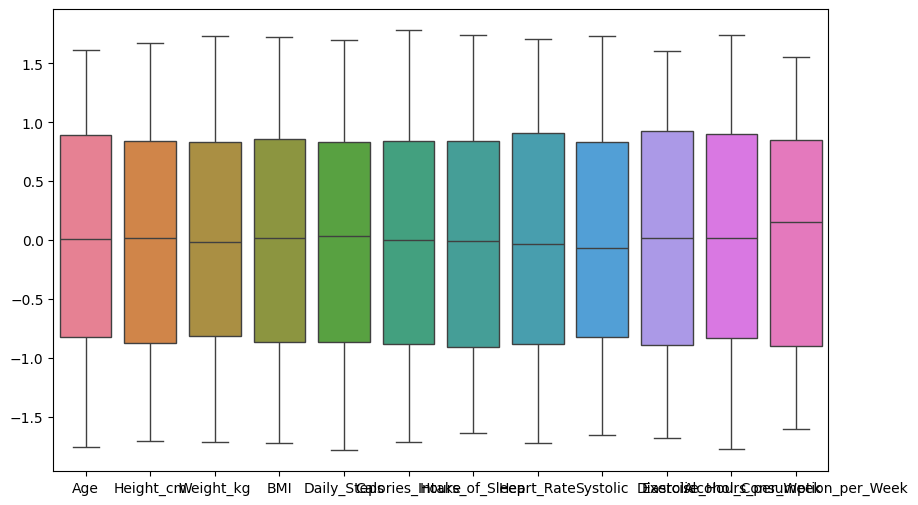

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.show()

# Remove outliers based on thresholds if necessary
